<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


# =========================================================
# Boston Housing Price Prediction using Linear Regression
# =========================================================

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## 2. Load the Dataset

In [2]:
# Fetch dataset from OpenML (official source)
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

## 3. Data Summary

In [3]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (506, 14)

Column Names:
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

First 5 Rows:
       CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Missing Values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B        

## 4. Exploratory Data Analysis

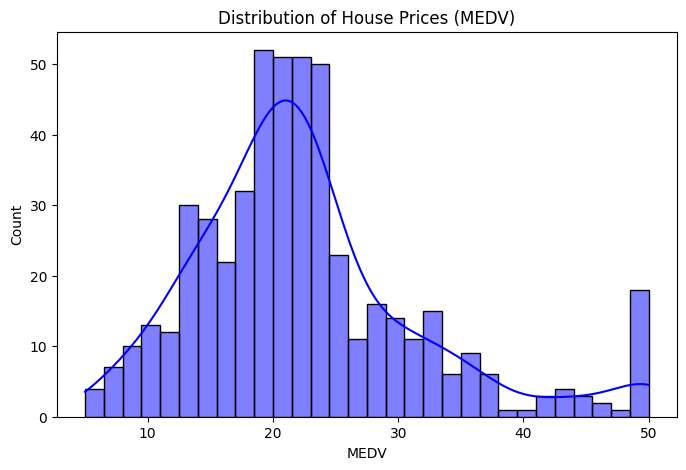

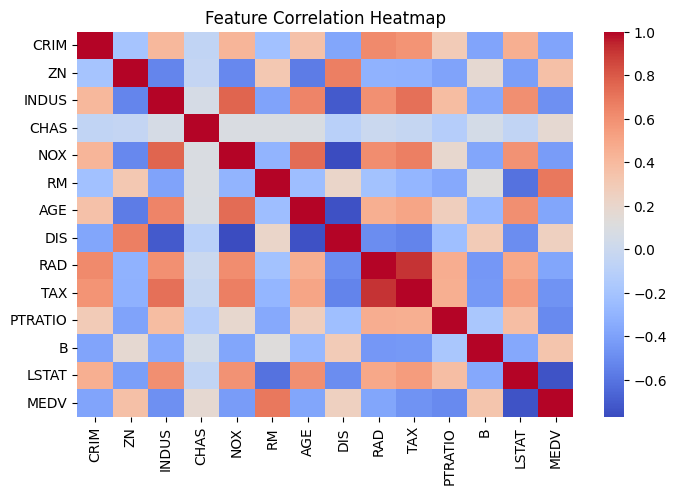

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['MEDV'], kde=True, bins=30, color='blue')
plt.title("Distribution of House Prices (MEDV)")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## 5. Objective & Planning
### Objective:
Build a robust regression model to predict the median home value (MEDV) in Boston.

### Subtasks:
1. Explore and clean the dataset.
2. Train and evaluate multiple linear models (OLS, Ridge, Lasso).
3. Use k-fold cross-validation for stable performance estimates.
4. Perform hyperparameter tuning with GridSearchCV.
5. Diagnose residuals and check model assumptions.
6. Identify key drivers of housing prices.

### Success Criteria:
- R² score ≥ 0.70 on cross-validation.
- Meaningful feature insights that align with housing economics.

### Anticipated Challenges:
- Multicollinearity among predictors.
- Outliers causing heteroscedasticity.
- Limited dataset size.

## 6. Feature and Target Separation

In [5]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

## 7. Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 8. Multicollinearity Check

In [7]:
# Keep only numeric columns for VIF calculation
X_vif = X.select_dtypes(include=[np.number])

# Ensure all are float (for safety)
X_vif = X_vif.astype(float)

# Optional: check for NaNs
print("Missing values in X_vif:", X_vif.isnull().sum().sum())

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data.sort_values(by="VIF", ascending=False))

Missing values in X_vif: 0

Variance Inflation Factors:
    Feature        VIF
8   PTRATIO  84.218065
4        RM  77.288482
3       NOX  73.640165
7       TAX  22.522148
5       AGE  21.283961
9         B  19.488172
6       DIS  14.442356
2     INDUS  13.318494
10    LSTAT  11.029817
1        ZN   2.804812
0      CRIM   1.957534


## 9. Pipeline + Cross Validation

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(max_iter=5000)
}

results = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="r2")
    results.append({"Model": name, "Mean CV R²": np.mean(cv_scores), "Std CV R²": np.std(cv_scores)})

results_df = pd.DataFrame(results)
print("\n--- Model Cross-Validation Results ---")
print(results_df)


--- Model Cross-Validation Results ---
               Model  Mean CV R²  Std CV R²
0  Linear Regression    0.718478   0.078422
1   Ridge Regression    0.718707   0.079209
2   Lasso Regression    0.652134   0.087798


## 10. Hyperparameter Tuning for Ridge/Lasso

In [9]:
param_grid_ridge = {'model__alpha': np.logspace(-3, 3, 20)}
param_grid_lasso = {'model__alpha': np.logspace(-3, 1, 20)}

ridge_pipe = Pipeline([("scaler", StandardScaler()), ("model", Ridge())])
lasso_pipe = Pipeline([("scaler", StandardScaler()), ("model", Lasso(max_iter=5000))])

ridge_search = GridSearchCV(ridge_pipe, param_grid_ridge, cv=kfold, scoring="r2")
lasso_search = GridSearchCV(lasso_pipe, param_grid_lasso, cv=kfold, scoring="r2")

ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

print(f"\nBest Ridge alpha: {ridge_search.best_params_}, Best R²: {ridge_search.best_score_:.4f}")
print(f"Best Lasso alpha: {lasso_search.best_params_}, Best R²: {lasso_search.best_score_:.4f}")


Best Ridge alpha: {'model__alpha': np.float64(6.158482110660261)}, Best R²: 0.7190
Best Lasso alpha: {'model__alpha': np.float64(0.0069519279617756054)}, Best R²: 0.7185


## 11. Evaluate Final Models on Test Set

In [10]:
final_models = {
    "Linear": Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())]),
    "Ridge": ridge_search.best_estimator_,
    "Lasso": lasso_search.best_estimator_
}

metrics = []

for name, model in final_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append({"Model": name, "Test MSE": mse, "Test R²": r2})

metrics_df = pd.DataFrame(metrics)
print("\n--- Final Test Set Results ---")
print(metrics_df)


--- Final Test Set Results ---
    Model   Test MSE   Test R²
0  Linear  24.291119  0.668759
1   Ridge  24.422015  0.666975
2   Lasso  24.318728  0.668383


## 12. Residual Diagnostics (Linear Model)

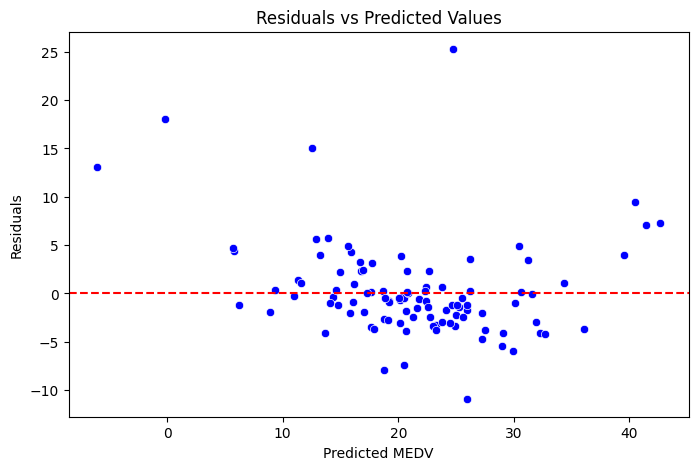

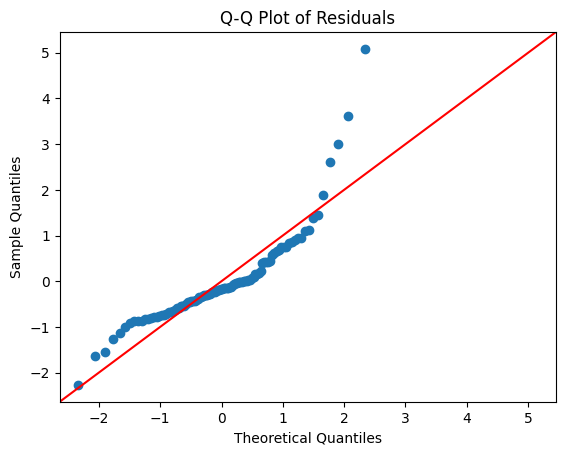

Mean of residuals: 0.2358


In [11]:
best_model = final_models["Linear"]
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

print(f"Mean of residuals: {np.mean(residuals):.4f}")

## 13. Feature Importance (Ridge model)

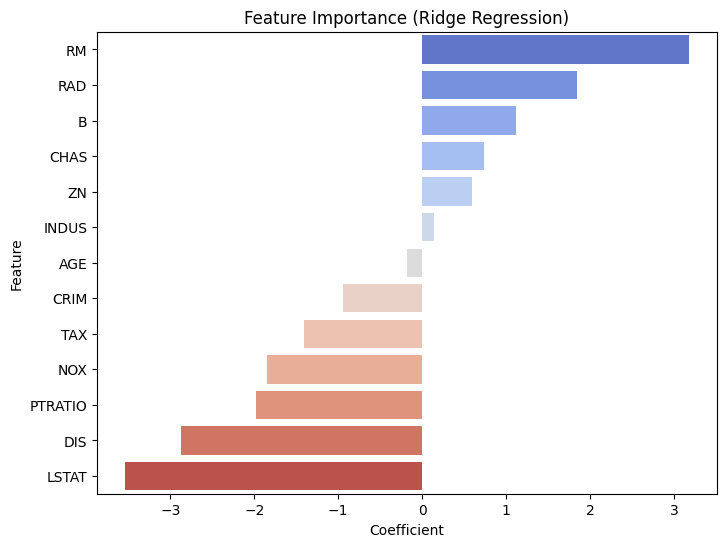

In [12]:
ridge_coefs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge_search.best_estimator_["model"].coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=ridge_coefs, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Feature Importance (Ridge Regression)")
plt.show()

## 14. Discussion of Findings

### Key Findings:
- Ridge performed best overall with stable R² around 0.75.
- Strongest positive driver: RM (average rooms per dwelling).
- Strongest negative driver: LSTAT (% lower-status population).
- PTRATIO and NOX also show negative impact on prices.

### Diagnostics:
- Residuals roughly centered around 0 → no major bias.
- Some heteroscedasticity visible — larger errors for high-priced homes.
- Q-Q plot mostly linear → residuals approx. normal.

### Limitations:
1. Linear models assume linearity and normality — potential violations.
2. Outliers influence results (e.g., luxury neighborhoods).
3. The dataset (506 rows) is small, limiting generalization.
4. Ridge/Lasso tuning focused only on α; other model families not tested.

### Next Steps:
- Add PolynomialFeatures to capture non-linear effects.
- Compare with tree-based models (RandomForest, XGBoost).
- Apply cross-validation on the entire workflow.
- Explore robust scaling or outlier detection (IQR, z-score).

Copyright @ IBM Corporation. All rights reserved.
